In [45]:
import numpy as np
import gdal
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
pip install pyshp

In [47]:
import geopandas as gpd
import shapefile

In [48]:
path = os.path.join("E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland")

In [49]:
shape = gpd.read_file(path)
type(shape)

geopandas.geodataframe.GeoDataFrame

In [50]:
shape

,DN,geometry
0,2,"POLYGON ((75.12620 30.57766, 75.12647 30.57766..."
1,2,"POLYGON ((75.12647 30.57739, 75.12701 30.57739..."
2,2,"POLYGON ((75.12728 30.57713, 75.12754 30.57713..."
3,2,"POLYGON ((75.12728 30.57551, 75.12754 30.57551..."
4,2,"POLYGON ((75.12997 30.56176, 75.13051 30.56176..."
...,...,...
2918,2,"POLYGON ((75.15476 29.78643, 75.15557 29.78643..."
2919,2,"POLYGON ((75.15099 29.78804, 75.15207 29.78804..."
2920,2,"POLYGON ((75.12701 29.80475, 75.12728 29.80475..."
2921,2,"POLYGON ((75.13913 29.77861, 75.13940 29.77861..."


In [51]:
shape.iloc[0,:]

DN                                                          2
geometry    POLYGON ((75.12619704244399 30.57766412461598,...
Name: 0, dtype: object

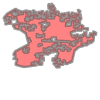

In [52]:
shape.iloc[2904,1]

In [53]:
np.array(shape["geometry"]).shape

(2923,)

In [54]:
type(shape["geometry"])

geopandas.geoseries.GeoSeries

In [55]:
print(shape["geometry"][0])

POLYGON ((75.12619704244399 30.57766412461598, 75.12646653702923 30.57766412461598, 75.12646653702923 30.57739463003075, 75.12619704244399 30.57739463003075, 75.12619704244399 30.57766412461598))


In [56]:
print(shape["geometry"][1])

POLYGON ((75.12646653702923 30.57739463003075, 75.12700552619971 30.57739463003075, 75.12700552619971 30.57685564086027, 75.12673603161447 30.57685564086027, 75.12673603161447 30.57712513544551, 75.12646653702923 30.57712513544551, 75.12646653702923 30.57739463003075))


In [57]:
label_roi = gdal.Open("E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\polytoras.tif")
print(label_roi)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001D02ADD4240> >


In [58]:
label_roi.RasterXSize, label_roi.RasterYSize, label_roi.RasterCount

(8298, 8963, 1)

In [59]:
label_roi.GetGeoTransform()

(74.621972673,
 8.979905145818209e-05,
 0.0,
 30.582245533,
 0.0,
 -8.984155093160736e-05)

In [60]:
roi = label_roi.GetRasterBand(1).ReadAsArray()
roi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# here 0 is non-agriculture and 2 is agriculture
# we need to consider only agriculture and exclude non-agriculture
# 0 is black

In [61]:
np.unique(roi)

array([0., 2.], dtype=float32)

In [62]:
type(roi)

numpy.ndarray

In [63]:
roi[5000,5000]

2.0

In [64]:
roi = roi.astype("uint8")

In [65]:
roi.shape

(8963, 8298)

In [66]:
type(roi)

numpy.ndarray

# now getting indcies of all non-agriculture(0)

In [67]:
np.count_nonzero(roi == 0)

40562567

In [68]:
non_agri_indices = np.argwhere(roi == 0)

In [69]:
non_agri_indices

array([[   0,    0],
       [   0,    1],
       [   0,    2],
       ...,
       [8962, 8295],
       [8962, 8296],
       [8962, 8297]], dtype=int64)

# indices of agriculture(2)

In [70]:
np.count_nonzero(roi == 2)

33812407

In [71]:
agri_indices = np.argwhere(roi == 2)

In [72]:
agri_indices

array([[   0, 5738],
       [   0, 5739],
       [   0, 5740],
       ...,
       [8962, 5789],
       [8962, 5790],
       [8962, 5791]], dtype=int64)

# saving the indices in csv form.

In [76]:
non_agri_indices_df = pd.DataFrame(data = non_agri_indices)

In [77]:
agri_indices_df = pd.DataFrame(data = agri_indices)

In [78]:
non_agri_indices_df.to_csv("E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\non_agri.csv")

In [79]:
agri_indices_df.to_csv("E:\\Internship_Harvesting\\Dataset\\Bathinda_Cropland\\agri.csv")

# using scikit image package for masking

In [80]:
import skimage.io as skio

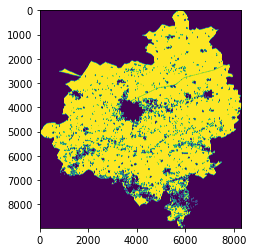

In [81]:
plt.imshow(roi)
plt.show()

In [82]:
the_mask = roi == 2

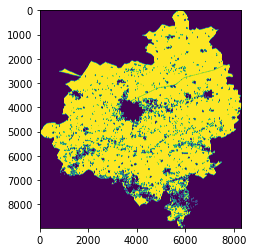

In [83]:
plt.imshow(the_mask)

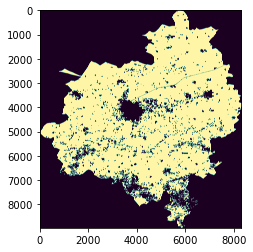

In [84]:
plt.imshow(roi, cmap="gray")    
plt.imshow(the_mask, alpha=0.4)